# Support Vector Machine (SVM)

**Support Vector Machine (SVM)** is a powerful supervised machine learning algorithm used for both classification and regression tasks. However, it is primarily known for classification problems. The main idea behind SVM is to find a hyperplane that best separates the data points of different classes in a high-dimensional space.

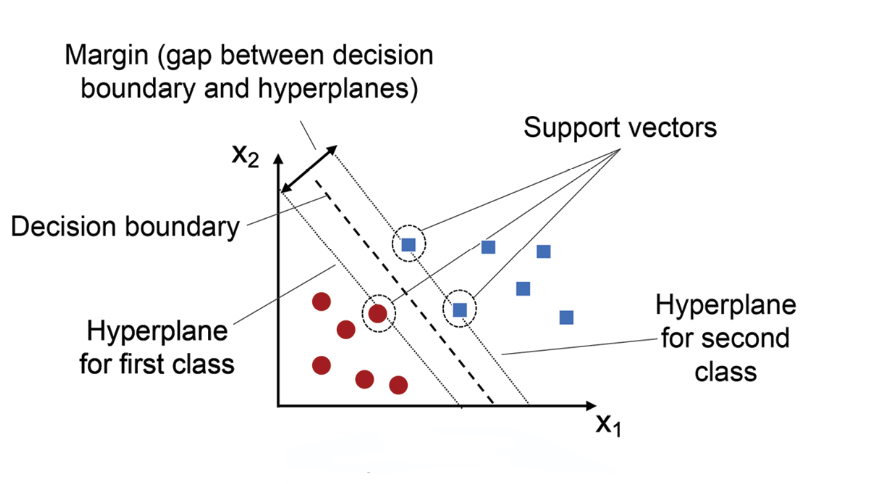

### How SVM Works

1. **Hyperplane**: A hyperplane in an SVM is the decision boundary that separates different classes in the dataset. In a 2D space, this would be a line; in a 3D space, it would be a plane; and in higher dimensions, it’s referred to as a hyperplane.

2. **Support Vectors**: These are the data points that are closest to the hyperplane. They are critical because the position of the hyperplane depends on these points. The SVM algorithm focuses on maximizing the margin around the hyperplane, which is the distance between the hyperplane and the nearest support vectors.

3. **Margin**: The margin is the gap between the nearest points (support vectors) of each class and the hyperplane. The SVM aims to maximize this margin to ensure that the model is robust and generalizes well to new data.

4. **Kernel Trick**: SVM can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping input features into high-dimensional feature spaces. Common kernels include:
   - **Linear Kernel**: Useful when data is linearly separable.
   - **Polynomial Kernel**: Handles data that is not linearly separable by mapping it into a higher dimension.
   - **Radial Basis Function (RBF) Kernel**: A popular choice for non-linear problems. It uses the Gaussian function to create decision boundaries.
  
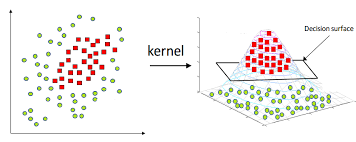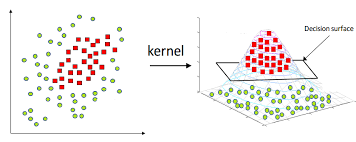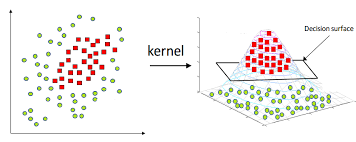

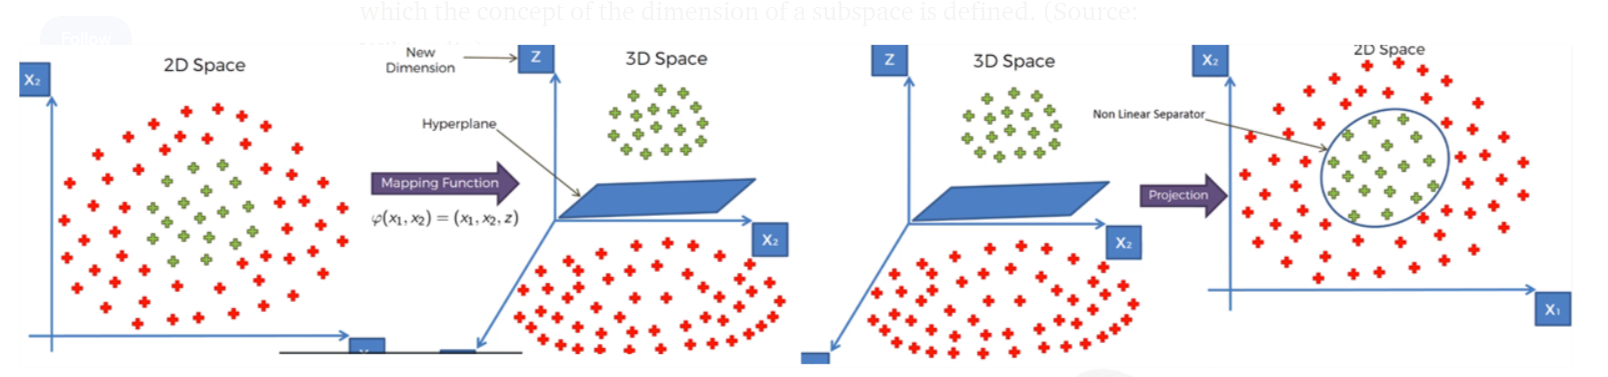

### Parameters in SVM

1. **C (Regularization Parameter)**:
   - **Role**: Controls the trade-off between maximizing the margin and minimizing the classification error.
   - **How to Select**: A small C value results in a wider margin and a softer decision boundary (allowing some misclassifications). A large C tries to classify all training examples correctly but might lead to overfitting.
   - **Tuning**: Use cross-validation to test different values and select the one that offers the best balance between accuracy and generalization.


2. **Kernel**:
   - **Role**: Determines the function used to transform data into a higher dimension.
   - **How to Select**: 
     - For linearly separable data, use a linear kernel.
     - For non-linear data, consider RBF or polynomial kernels.
     - Tuning can involve testing different kernels using cross-validation.


3. **Gamma** (For RBF, Polynomial, and Sigmoid kernels):
   - **Role**: Defines how far the influence of a single training example reaches.
   - **How to Select**: 
     - A small gamma means a large influence radius, leading to a smoother decision boundary.
     - A large gamma focuses more on individual points, leading to a more complex decision boundary.
     - Tuning is typically done via grid search or cross-validation.


4. **Degree** (For Polynomial Kernel):
   - **Role**: Represents the degree of the polynomial used to transform the data.
   - **How to Select**: Usually, this is set to a low value (2 or 3), but it can be tuned based on model performance.

5. **Coef0** (For Polynomial and Sigmoid kernels):
   - **Role**: A parameter that trades off the influence of higher-order versus lower-order terms in the polynomial kernel.
   - **How to Select**: Often starts at 0, but can be tuned if necessary.

### **When to Use SVM**

1. **High-Dimensional Spaces**: SVM performs well in spaces with many dimensions, even when the number of dimensions exceeds the number of samples.
  
2. **Clear Margin of Separation**: When the classes are well separated and the boundary between them is clear, SVM excels.

3. **Complex Decision Boundaries**: SVM is useful when you need a complex, non-linear decision boundary but want to maintain robustness and generalizability.

4. **Limited Number of Samples**: SVM is effective with relatively small datasets, especially when combined with an appropriate kernel.

### Optimal Parameter Selection

1. **Grid Search with Cross-Validation**: Systematically test different combinations of hyperparameters (like C and gamma) to find the best configuration.
  
2. **Randomized Search**: Similar to grid search but explores a wider range of hyperparameters randomly, which can be more efficient in some cases.

3. **Bayesian Optimization**: Uses probabilistic models to select the most promising hyperparameters, focusing on finding the best configuration with fewer iterations.

### Common Use Cases for SVM

1. **Image Classification**: SVM is often used in image classification tasks due to its ability to handle high-dimensional data.
   
2. **Text Categorization**: In natural language processing, SVMs are widely used for text classification tasks like spam detection and sentiment analysis.

3. **Bioinformatics**: SVM is used for classification tasks in bioinformatics, such as cancer classification using gene expression data.

### Why Use SVM

- **Effective in High Dimensions**: SVMs work well in spaces with many features.
- **Memory Efficient**: Only a subset of training points (support vectors) are used in the decision function, making SVMs more efficient.
- **Versatile**: SVMs can be adapted to various types of problems with different kernels.

### Conclusion
SVM is a versatile and powerful tool, particularly for classification problems in high-dimensional spaces. Its strength lies in its ability to create complex decision boundaries and generalize well to new data. However, selecting the right parameters and kernel function is crucial for its success, and this often involves careful tuning and cross-validation.

# Importing Basic Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Reading and Describing the Data

In [5]:
df = pd.read_csv('income_evaluation.csv')

In [7]:
df.head()

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


1. **`age`**: Continuous variable representing the individual's age.

3. **`workclass`**: Categorical variable indicating the type of work (e.g., Private, Self-emp, Government, etc.).
4. **`fnlwgt`**: A continuous variable that represents the final weight. This is a statistical estimate of the number of people in the population that the record represents.
5. **`education`**: Categorical variable indicating the highest level of education achieved (e.g., Bachelors, HS-grad, Masters).
6. **`education-num`**: Continuous variable representing the number of years of education completed (associated with the `education` category).
7. **`marital-status`**: Categorical variable indicating the marital status (e.g., Married, Never-married, Divorced).
8. **`occupation`**: Categorical variable representing the type of occupation (e.g., Tech-support, Craft-repair).
9. **`relationship`**: Categorical variable indicating the individual's relationship status within a household (e.g., Husband, Wife, Not-in-family).
10. **`race`**: Categorical variable indicating the individual's race (e.g., White, Black, Asian-Pac-Islander).
11. **`sex`**: Categorical variable indicating the individual's gender (Male or Female).
12. **`capital-gain`**: Continuous variable representing capital gains.
13. **`capital-loss`**: Continuous variable representing capital losses.
14. **`hours-per-week`**: Continuous variable indicating the number of hours worked per week.
15. **`native-country`**: Categorical variable indicating the individual's country of origin.
16. **`income`**: Target variable (binary) indicating whether the individual's income exceeds $50K/year (`>50K`) or not (`<=50K`).

# Data Preprocessing and Exploration

In [13]:
cleaned_columns = [col.strip() for col in df.columns]

In [15]:
df.columns = cleaned_columns

In [17]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [19]:
df = df.drop(['capital-loss', 'capital-gain','fnlwgt'], axis=1)

In [21]:
df['native-country'].values

array([' United-States', ' United-States', ' United-States', ...,
       ' United-States', ' United-States', ' United-States'], dtype=object)

In [23]:
df = df[df['native-country'] == ' United-States']

In [25]:
df = df.replace(' ?', np.nan)

In [27]:
df = df.dropna()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27504 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             27504 non-null  int64 
 1   workclass       27504 non-null  object
 2   education       27504 non-null  object
 3   education-num   27504 non-null  int64 
 4   marital-status  27504 non-null  object
 5   occupation      27504 non-null  object
 6   relationship    27504 non-null  object
 7   race            27504 non-null  object
 8   sex             27504 non-null  object
 9   hours-per-week  27504 non-null  int64 
 10  native-country  27504 non-null  object
 11  income          27504 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.7+ MB


Numerical Columns in data are :  ['age', 'education-num', 'hours-per-week']


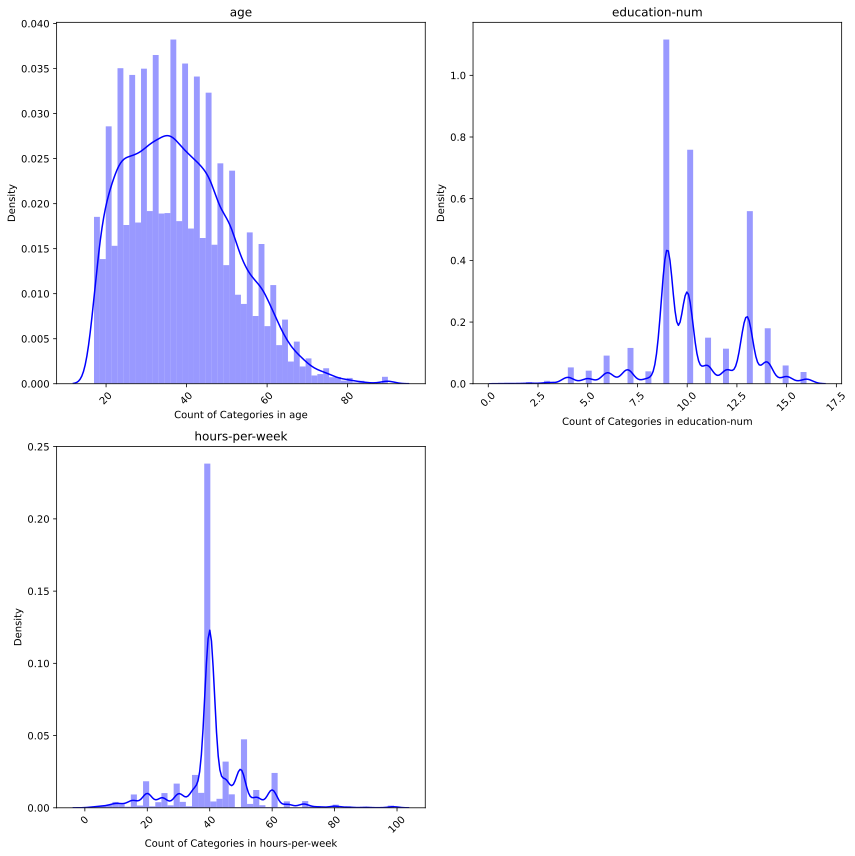

In [31]:
Numerical_Columns = [i for i in df.columns if df[i].dtype != 'object']
print("Numerical Columns in data are : ",Numerical_Columns)

num_cols = 2
num_rows = int(np.ceil(len(Numerical_Columns) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
axes = axes.flatten()

for i, col in enumerate(Numerical_Columns):
    sns.distplot(df, x=df[col], color='blue', ax=axes[i])
    axes[i].set_xlabel(f'Count of Categories in {col}')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(len(Numerical_Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Categorical Columns in data are :  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']


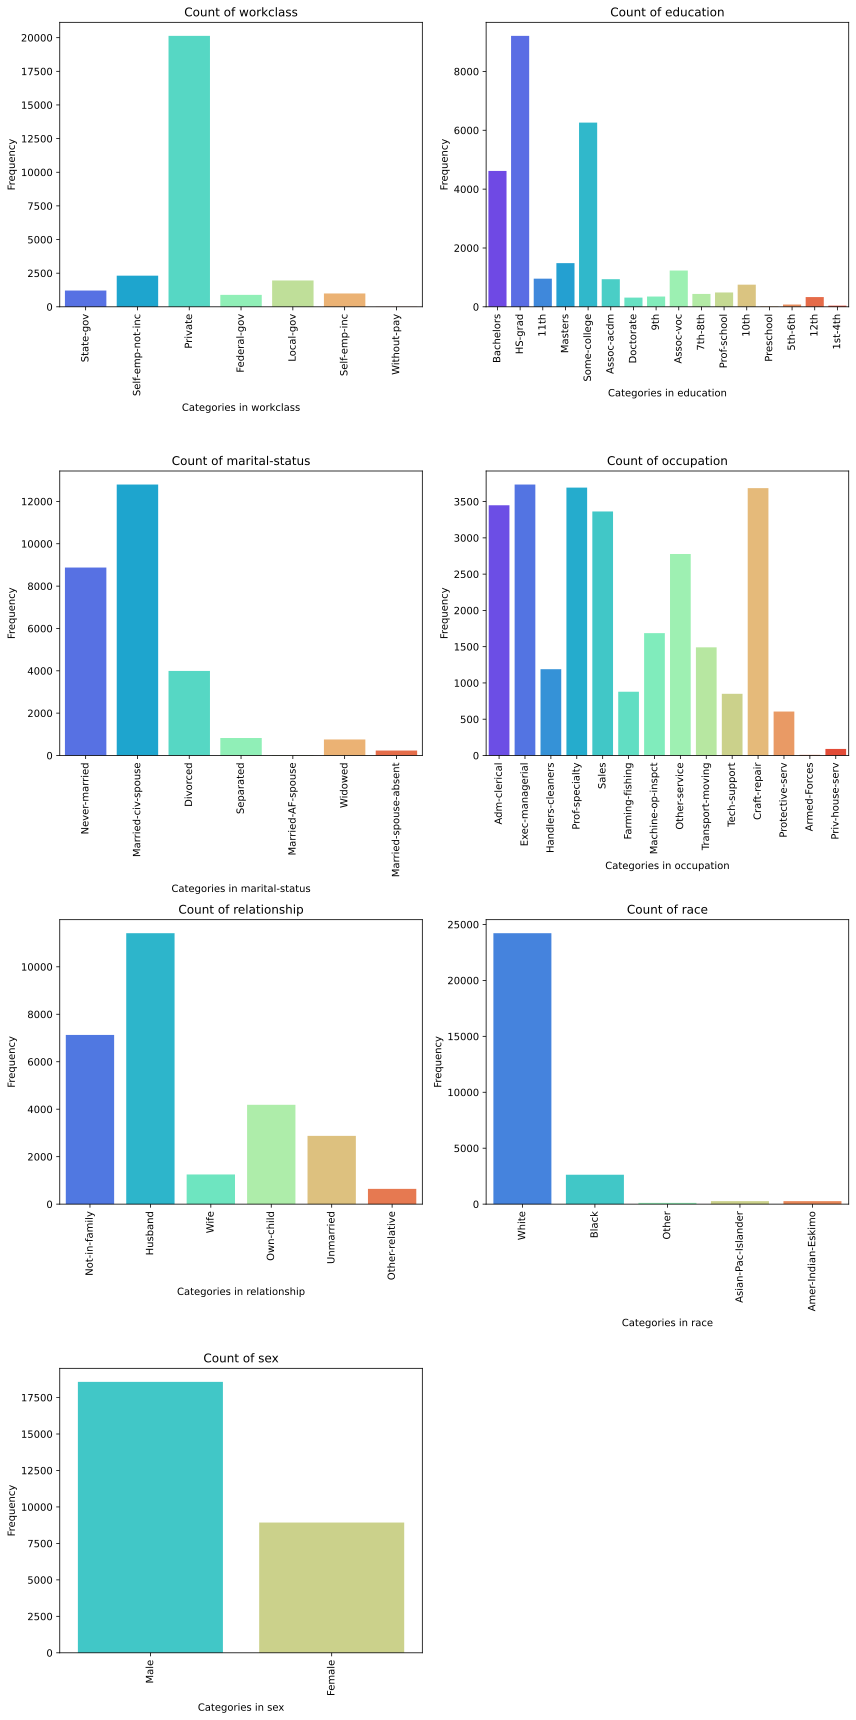

In [33]:
Categorical_Columns = [i for i in df.columns if (df[i].dtype == 'object') and (i not in (['income','native-country']))]
print("Categorical Columns in data are : ", Categorical_Columns)

num_cols = 2
num_rows = int(np.ceil(len(Categorical_Columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
axes = axes.flatten()

for i, col in enumerate(Categorical_Columns):
    sns.countplot(data=df, x=col, palette='rainbow', ax=axes[i])
    axes[i].set_xlabel(f'Categories in {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=90)

for j in range(len(Categorical_Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: xlabel='income', ylabel='count'>

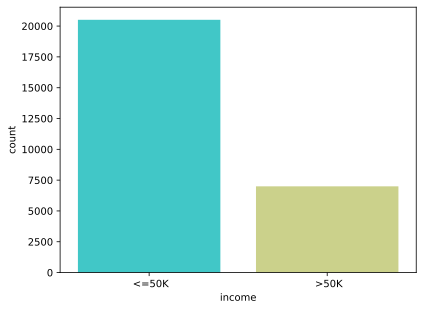

In [34]:
sns.countplot(x = df['income'],palette='rainbow')

In [37]:
from collections import Counter
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
 per = v / len(target) * 100
 print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class= <=50K, Count=20509, Percentage=74.567%
Class= >50K, Count=6995, Percentage=25.433%


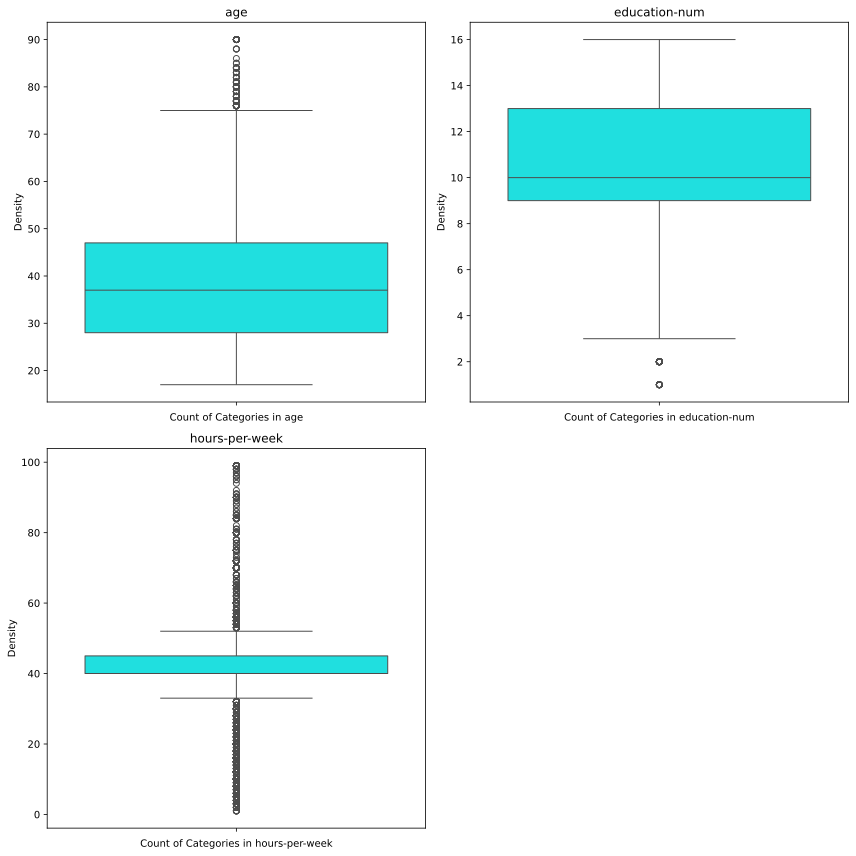

In [39]:
num_cols = 2
num_rows = int(np.ceil(len(Numerical_Columns) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
axes = axes.flatten()

for i, col in enumerate(Numerical_Columns):
    sns.boxplot(df, y=df[col], color='cyan', ax=axes[i])
    axes[i].set_xlabel(f'Count of Categories in {col}')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(len(Numerical_Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [41]:
df_workclass_by_gen = df.groupby(['workclass','sex','income'])['income'].count()
df_workclass_by_gen

workclass         sex     income
Federal-gov       Female  <=50K      242
                          >50K        50
                  Male    <=50K      308
                          >50K       286
Local-gov         Female  <=50K      637
                          >50K       143
                  Male    <=50K      744
                          >50K       432
Private           Female  <=50K     6264
                          >50K       662
                  Male    <=50K     9330
                          >50K      3879
Self-emp-inc      Female  <=50K       75
                          >50K        33
                  Male    <=50K      358
                          >50K       525
Self-emp-not-inc  Female  <=50K      285
                          >50K        72
                  Male    <=50K     1369
                          >50K       587
State-gov         Female  <=50K      400
                          >50K        64
                  Male    <=50K      484
                        

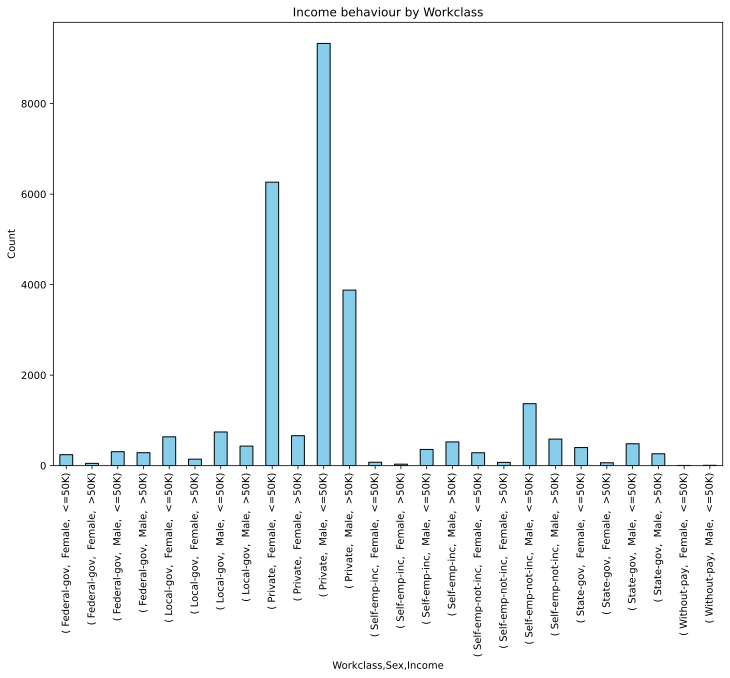

In [43]:
plt.figure(figsize=(12,8))
df_workclass_by_gen.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Workclass,Sex,Income')
plt.ylabel('Count')
plt.title('Income behaviour by Workclass')
plt.show()

In [55]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']

le = LabelEncoder()

class_mappings = {}

def encode_and_compress(df, column):
    df[column] = le.fit_transform(df[column])
    class_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    one_hot = pd.get_dummies(df[column], prefix=column)
    df[column + '_encoded'] = one_hot.dot(range(one_hot.shape[1]))
    return df

for col in categorical_columns:
    df = encode_and_compress(df, col)

df.drop(columns=categorical_columns, inplace=True)


for col, mapping in class_mappings.items():
    print(f"Column: {col}")
    for k, v in mapping.items():
        print(f"  {k}: {v}")
    print()

Column: workclass
   Federal-gov: 0
   Local-gov: 1
   Private: 2
   Self-emp-inc: 3
   Self-emp-not-inc: 4
   State-gov: 5
   Without-pay: 6

Column: education
   10th: 0
   11th: 1
   12th: 2
   1st-4th: 3
   5th-6th: 4
   7th-8th: 5
   9th: 6
   Assoc-acdm: 7
   Assoc-voc: 8
   Bachelors: 9
   Doctorate: 10
   HS-grad: 11
   Masters: 12
   Preschool: 13
   Prof-school: 14
   Some-college: 15

Column: marital-status
   Divorced: 0
   Married-AF-spouse: 1
   Married-civ-spouse: 2
   Married-spouse-absent: 3
   Never-married: 4
   Separated: 5
   Widowed: 6

Column: occupation
   Adm-clerical: 0
   Armed-Forces: 1
   Craft-repair: 2
   Exec-managerial: 3
   Farming-fishing: 4
   Handlers-cleaners: 5
   Machine-op-inspct: 6
   Other-service: 7
   Priv-house-serv: 8
   Prof-specialty: 9
   Protective-serv: 10
   Sales: 11
   Tech-support: 12
   Transport-moving: 13

Column: relationship
   Husband: 0
   Not-in-family: 1
   Other-relative: 2
   Own-child: 3
   Unmarried: 4
   Wife: 5

Col

In [45]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [47]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [49]:
df['sex'] = df['sex'].map({' Male': 1, ' Female': 0})
df['income'] = df['income'].map({' <=50K' : 1, ' >50K': 0})

#### Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
df['age'] = scaler_standard.fit_transform(df['age'].values.reshape(-1, 1)).flatten()
scaler_minmax = MinMaxScaler()

df['education-num'] = scaler_minmax.fit_transform(df['education-num'].values.reshape(-1, 1)).flatten()
df['hours-per-week'] = scaler_minmax.fit_transform(df['hours-per-week'].values.reshape(-1, 1)).flatten()

In [57]:
df.head()

age  education-num  sex  hours-per-week  native-country  income  \
0  0.037599       0.800000    1        0.397959   United-States       1   
1  0.871936       0.800000    1        0.122449   United-States       1   
2 -0.038250       0.533333    1        0.397959   United-States       1   
3  1.099483       0.400000    1        0.397959   United-States       1   
5 -0.114099       0.866667    0        0.397959   United-States       1   

   workclass_encoded  education_encoded  marital-status_encoded  \
0                  5                  9                       4   
1                  4                  9                       2   
2                  2                 11                       0   
3                  2                  1                       2   
5                  2                 12                       2   

   occupation_encoded  relationship_encoded  race_encoded  
0                   0                     1             4  
1                   3                     0             4  
2                   5                     1             4  
3                   5                     0             2  
5                   3                     5             4

#### Deifining X and y varaible as independent and dependent variable.

In [59]:
X = df.drop(columns = ['native-country', 'income'])
y = df['income']

## Applying PCA n = 2

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Model Buidling

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [67]:
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [ ]:
y_pred = svm_model.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7438647518632976
Precision: 0.7438647518632976
Recall: 1.0
F1 Score: 0.8531220681747107
ROC AUC Score: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1409
           1       0.74      1.00      0.85      4092

    accuracy                           0.74      5501
   macro avg       0.37      0.50      0.43      5501
weighted avg       0.55      0.74      0.63      5501



# Model Summary

### **Accuracy Scores**
| **Metric**           | **Value**         | **Description**                                                                 |
|----------------------|-------------------|---------------------------------------------------------------------------------|
| **Accuracy**         | 0.7439            | Proportion of correctly classified instances out of the total instances.        |
| **Precision**        | 0.7439            | Proportion of true positive predictions among all positive predictions.         |
| **Recall**           | 1.0               | Proportion of true positive predictions among all actual positives (sensitivity).|
| **F1 Score**         | 0.8531            | Harmonic mean of precision and recall, providing a balance between the two.      |
| **ROC AUC Score**    | 0.5               | Measures the model's ability to distinguish between classes; 0.5 indicates no better than random guessing. |

### **Classification Report**

| **Class** | **Precision** | **Recall** | **F1-Score** | **Support** | **Description**                                          |
|-----------|---------------|------------|--------------|-------------|----------------------------------------------------------|
| **0**     | 0.00          | 0.00       | 0.00         | 1409        | Model failed to correctly predict any instances of this class. |
| **1**     | 0.74          | 1.00       | 0.85         | 4092        | Model performed well in predicting this class, with perfect recall. |

### **Average Metrics**

| **Metric**        | **Value** | **Description**                                                                                   |
|-------------------|-----------|--------------------------------------------------------------------------------------------------|
| **Macro Avg**     |           | Average performance across classes, treating each class equally.                                  |
| - Precision       | 0.37      | Reflects poor performance on the minority class (Class 0).                                        |
| - Recall          | 0.50      | Indicates the model is not balanced in recognizing both classes.                                 |
| - F1-Score        | 0.43      | Low F1-score due to the model's inability to handle the minority class.                           |
| **Weighted Avg**  |           | Average performance weighted by the number of instances in each class.                            |
| - Precision       | 0.55      | Indicates better performance for the majority class but still lacking overall precision.          |
| - Recall          | 0.74      | Reflects the model's overall ability to identify positives correctly.                             |
| - F1-Score        | 0.63      | Balanced view of precision and recall, considering class imbalances.                             |

# Visualzing 2D Decision Boundry

In [73]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

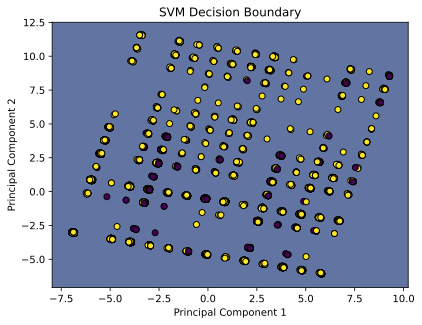

In [75]:
def plot_decision_boundary(model, X, y):
    h = .1  # Adjusted step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title("SVM Decision Boundary")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

plot_decision_boundary(svm_model, X_test, y_test)

## Applying PCA n = 3

In [ ]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

# Model Buidling PCA = 3 

In [76]:
X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(X_pca_3d, y, test_size=0.2, random_state=42)
svm_model.fit(X_train_3d, y_train_3d)

SVC(random_state=42)

# Visualizing 3D Decision Boundry

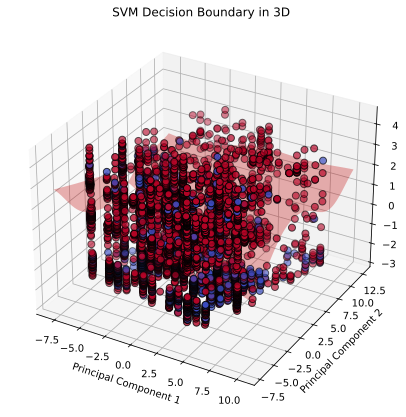

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_3d_decision_boundary(model, X, y):
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the points
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cm.coolwarm, edgecolor='k', s=50)
    
    # Create a grid to plot the decision boundary
    xlim = (X[:, 0].min() - 1, X[:, 0].max() + 1)
    ylim = (X[:, 1].min() - 1, X[:, 1].max() + 1)
    zlim = (X[:, 2].min() - 1, X[:, 2].max() + 1)
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    
    zz = np.zeros_like(xx)
    
    # Calculate decision function values for the grid
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            # Make sure to provide the third dimension's value if required
            sample = np.array([[xx[i, j], yy[i, j], 0]])
            zz[i, j] = model.decision_function(sample)[0]

    # Plot the decision boundary
    ax.plot_surface(xx, yy, zz, color='red', alpha=0.3, rstride=100, cstride=100)

    # Set labels
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    
    plt.title("SVM Decision Boundary in 3D")
    plt.show()

# Use the function with your model and data
plot_3d_decision_boundary(svm_model, X_test_3d, y_test_3d)